In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize

In [2]:
import nltk
nltk.download('punkt') #This tokenizer divides a text into a list of sentences, using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import os
f_list = os.listdir()

nontech_articles = []
tech_articles = []

for filename in f_list:
  if filename.startswith('nontech'):
    with open(filename) as f:
      contents = f.read()
      nontech_articles.append(contents)
  elif filename.startswith('tech'):
    with open(filename) as f:
      contents = f.read()
      tech_articles.append(contents)

len(nontech_articles)

7

In [4]:
nontech = ' '.join(nontech_articles)
tech = ' '.join(tech_articles)


### Basic Cleaning 
This function takes in the list of words and returns a cleaner set of words. This includes normalization, encoding/decoding, lower casing, and lemmatization. 

In [5]:
# importing stopwords from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 
nltk.download('wordnet') # WordNet is an English dictionary which is a part of Natural Language Tool Kit (NLTK) for Python. This is an extensive library built to make Natural Language Processing (NLP) easy.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

In [7]:
import string

def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  text.translate(str.maketrans('', '', string.punctuation))
  text = text.replace('.','')
  text = text.replace('\'','')
  text = text.replace(',','')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
nontech_words = basic_clean(nontech)
tech_words = basic_clean(tech)

In [67]:
tech_words.find('po')

AttributeError: ignored

In [10]:
# Tokenization
from nltk.tokenize import word_tokenize # Passing the string text into word tokenize for breaking the sentences

nontech_token = word_tokenize(str(nontech_words))
tech_token = word_tokenize(str(tech_words))

In [11]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
# Title 
from nltk.probability import FreqDist
fdist_nontech = FreqDist(nontech_token).most_common(50)
fdist_nontech

[("'", 7376),
 (',', 7374),
 ("'said", 99),
 ("'pipeline", 95),
 ("'information", 82),
 ("'company", 75),
 ("'security", 63),
 ("'attack", 62),
 ("'colonial", 54),
 ("'system", 53),
 ("'business", 52),
 ("'data", 51),
 ("'breach", 45),
 ("'hacker", 43),
 ("'network", 42),
 ("'may", 41),
 ("'ransomware", 40),
 ("'also", 40),
 ("'million", 40),
 ("'target", 39),
 ("'cybersecurity", 36),
 ("'credit", 36),
 ("'one", 32),
 ("'equifax", 32),
 ("'u", 31),
 ("'would", 31),
 ("'biden", 30),
 ("'consumer", 30),
 ("'government", 29),
 ("'fuel", 29),
 ("'cost", 29),
 ("'group", 26),
 ("'darkside", 25),
 ("'day", 25),
 ("'russia", 25),
 ("'access", 25),
 ("'computer", 23),
 ("'year", 23),
 ("'state", 23),
 ("'operation", 23),
 ("'card", 23),
 ("'new", 22),
 ("'service", 21),
 ("'take", 21),
 ("'could", 21),
 ("'ransom", 21),
 ("'mr", 21),
 ("'employee", 21),
 ("'coast", 20),
 ("'administration", 20)]

In [12]:
from nltk.probability import FreqDist
fdist_tech = FreqDist(tech_token).most_common(50)
fdist_tech

[("'", 11146),
 (',', 11141),
 ("'00", 195),
 ("'darkside", 119),
 ("'network", 101),
 ("'file", 98),
 ("'ransomware", 94),
 ("'system", 86),
 ("'data", 85),
 ("'vulnerability", 66),
 ("'actor", 66),
 ("'threat", 60),
 ("'malware", 59),
 ("'security", 58),
 ("'target", 57),
 ("'malicious", 57),
 ("'variant", 45),
 ("'victim", 44),
 ("'download", 44),
 ("'used", 43),
 ("'figure", 43),
 ("'using", 42),
 ("'control", 42),
 ("'transfer", 41),
 ("'access", 41),
 ("'also", 41),
 ("'apache", 39),
 ("'strut", 38),
 ("'attack", 37),
 ("'patch", 37),
 ("'company", 36),
 ("'attacker", 36),
 ("'cisa", 34),
 ("'version", 33),
 ("'could", 33),
 ("'may", 33),
 ("'asset", 33),
 ("'ot", 33),
 ("'information", 32),
 ("'equifax", 31),
 ("'response", 30),
 ("'service", 30),
 ("'cybersecurity", 29),
 ("'application", 29),
 ("'65", 29),
 ("'organization", 28),
 ("'critical", 27),
 ("'pipeline", 27),
 ("'program", 27),
 ("'team", 26)]

In [13]:
# importing stopwords from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 
nltk.download('wordnet') # WordNet is an English dictionary which is a part of Natural Language Tool Kit (NLTK) for Python. This is an extensive library built to make Natural Language Processing (NLP) easy.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#2-Gram Comparison

In [14]:
(pd.Series(nltk.ngrams(nontech_words, 2)).value_counts())[:25]

(colonial, pipeline)          29
(east, coast)                 18
(mr, biden)                   15
(credit, card)                12
(critical, infrastructure)    12
(ransomware, attack)          11
(small, business)             10
(system, network)             10
(personal, information)        9
(malicious, code)              9
(biden, said)                  8
(blount, said)                 8
(united, state)                8
(jet, fuel)                    8
(information, security)        8
(law, enforcement)             7
(ransomware, group)            7
(new, york)                    7
(data, breach)                 7
(national, security)           7
(gas, station)                 6
(operational, technology)      6
(pipeline, shut)               6
(information, used)            6
(information, system)          6
dtype: int64

In [78]:
(pd.Series(nltk.ngrams(tech_words, 2)).value_counts())[1:25]

(file, transfer)              40
(malicious, file)             39
(download, variant)           38
(threat, actor)               38
(transfer, darkside)          35
(darkside, download)          35
(apache, strut)               32
(darkside, ransomware)        29
(ot, network)                 26
(7c, 7c)                      19
(01, 01)                      15
(strut, vulnerability)        13
(kill, chain)                 12
(emergency, response)         11
(command, control)            11
(signature, rule)             10
(cisa, fbi)                   10
(network, asset)              10
(3d, 22)                      10
(stolen, data)                 9
(listed, figure)               9
(72, 6f)                       8
(22, 20)                       8
(critical, infrastructure)     8
dtype: int64

#3-Gram Comparison

In [16]:
(pd.Series(nltk.ngrams(nontech_words, 3)).value_counts())[:25]

(mr, biden, said)                   6
(information, system, network)      5
(gasoline, jet, fuel)               5
(like, russia, china)               4
(along, east, coast)                4
(russia, china, iran)               4
(state, like, russia)               4
(free, credit, monitoring)          4
(information, used, business)       4
(fuel, east, coast)                 3
(colonial, pipeline, shut)          3
(privately, held, company)          3
(social, security, number)          3
(silverado, policy, accelerator)    3
(half, gasoline, jet)               3
(nearly, half, gasoline)            3
(pipeline, resumed, operation)      3
(virtual, private, network)         3
(law, enforcement, agency)          3
(pipeline, united, state)           3
(business, need, protection)        3
(ransom, one, day)                  3
(chief, executive, officer)         3
(colonial, pipeline, would)         3
(business, information, system)     3
dtype: int64

In [79]:
(pd.Series(nltk.ngrams(tech_words, 3)).value_counts())[1:25]

(malicious, file, transfer)         39
(darkside, download, variant)       35
(transfer, darkside, download)      35
(file, transfer, darkside)          35
(7c, 7c, 7c)                        18
(apache, strut, vulnerability)      13
(01, 01, 01)                        11
(vulnerable, version, apache)        6
(step, kill, chain)                  6
(destructive, event, nist)           6
(ransomware, destructive, event)     6
(65, 3d, 22)                         6
(industrial, control, system)        6
(03, 00, 00)                         6
(00, 00, 110)                        5
(6f, 6b, 65)                         5
(threat, actor, appeared)            5
(6b, 65, 6e)                         5
(phase, kill, chain)                 5
(delete, volume, shadow)             5
(volume, shadow, copy)               5
(version, apache, strut)             5
(string, listed, figure)             5
(control, system, ic)                5
dtype: int64

### Visualization
Created horizontal graphs. 

In [80]:
bigrams_series_nontech = (pd.Series(nltk.ngrams(nontech_words, 2)).value_counts())[:25]
trigrams_series_nontech = (pd.Series(nltk.ngrams(nontech_words, 3)).value_counts())[:25]

bigrams_series_tech = (pd.Series(nltk.ngrams(tech_words, 2)).value_counts())[1:25]
trigrams_series_tech = (pd.Series(nltk.ngrams(tech_words, 3)).value_counts())[1:25]




Text(0.5, 1.0, '25 Most Frequently Occurring Bigrams for Non-Technical Articles')

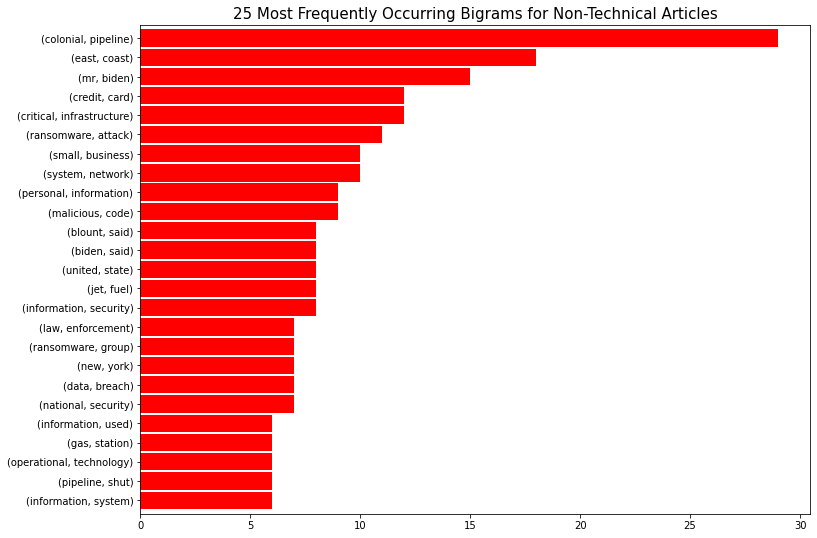

In [35]:
bigrams_series_nontech.sort_values().plot.barh(color='red', width=.9, figsize=(12, 9)).set_title('25 Most Frequently Occurring Bigrams for Non-Technical Articles',fontsize=15
                                                                                                 )

Text(0.5, 1.0, '25 Most Frequently Occurring Bigrams for Technical Articles')

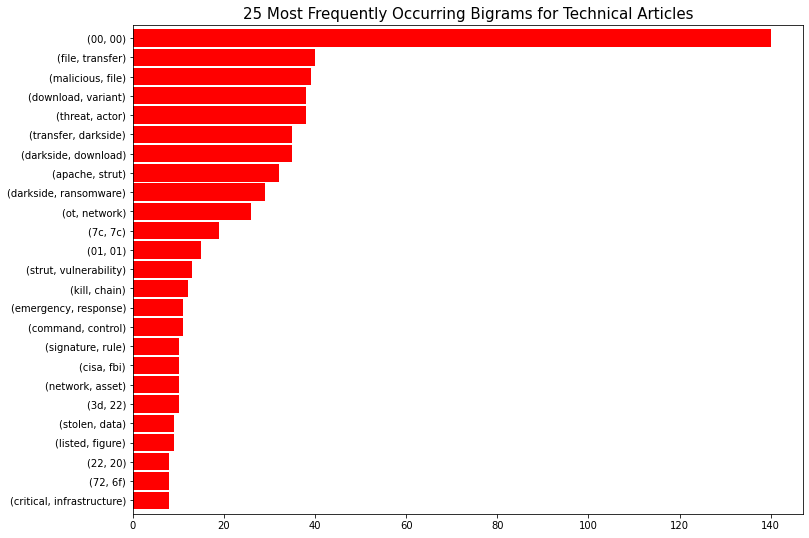

In [38]:
bigrams_series_tech.sort_values().plot.barh(color='red', width=.9, figsize=(12, 9)).set_title('25 Most Frequently Occurring Bigrams for Technical Articles',fontsize=15)

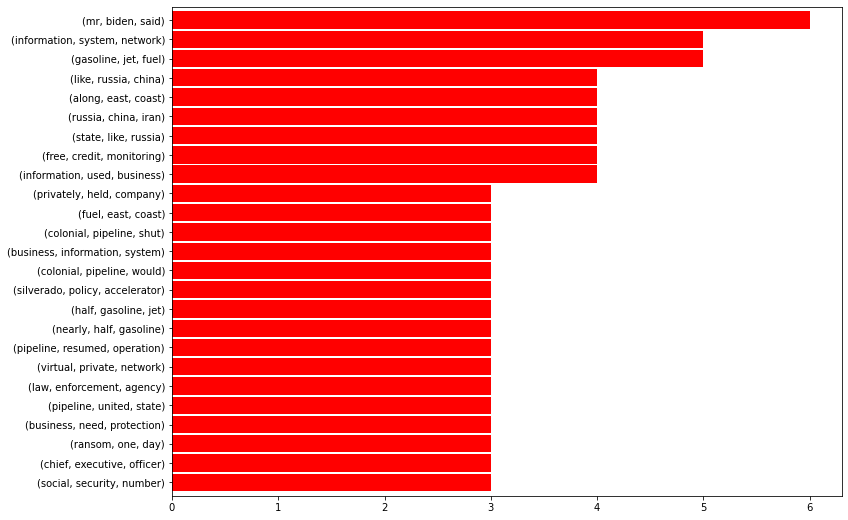

In [82]:
trigrams_series_nontech.sort_values().plot.barh(color='red', width=.9, figsize=(12, 9))

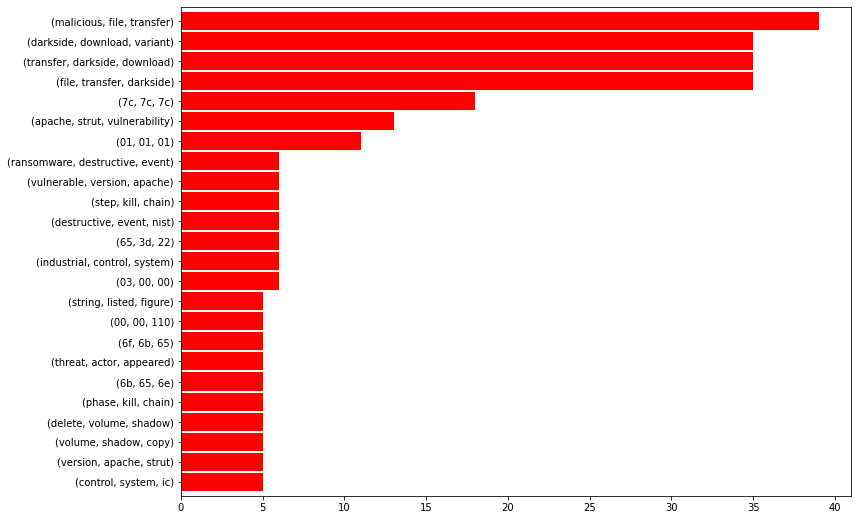

In [84]:
trigrams_series_tech.sort_values().plot.barh(color='red', width=.9, figsize=(12, 9))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

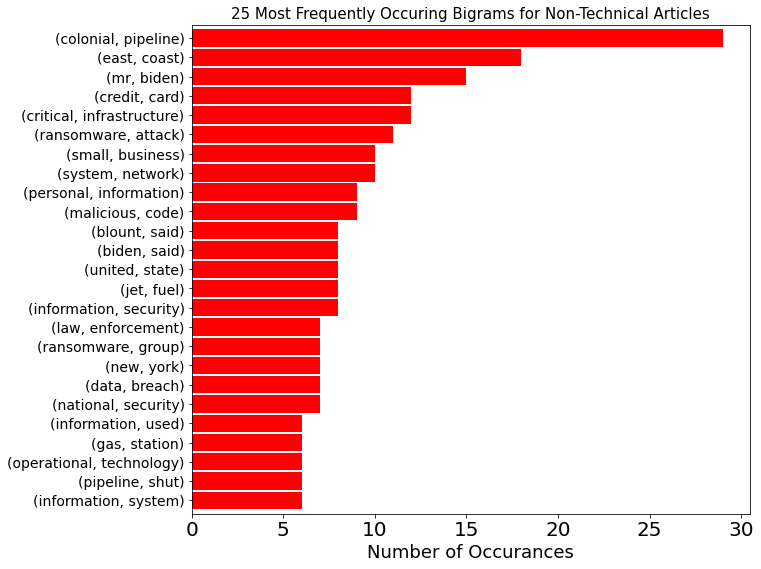

In [50]:
bigrams_series_nontech.sort_values().plot.barh(color='red', width=.9, figsize=(10, 9))
plt.title('25 Most Frequently Occuring Bigrams for Non-Technical Articles', fontsize=(15))
plt.xlabel('Number of Occurances', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

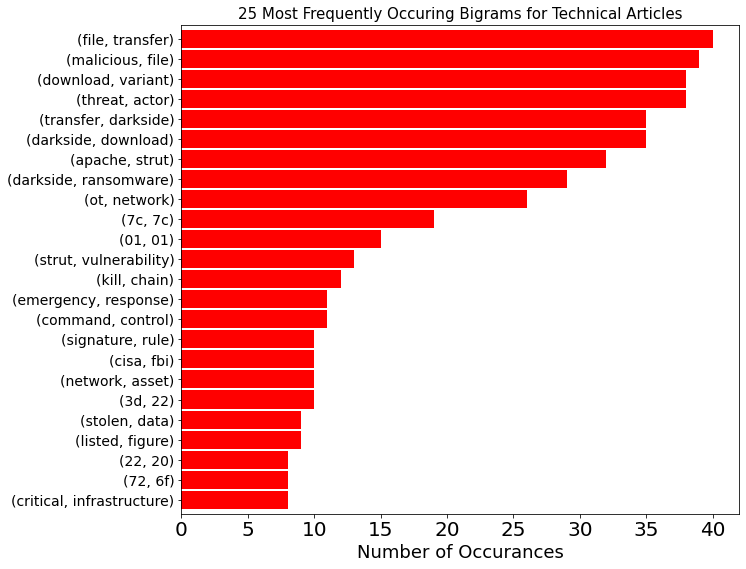

In [87]:
bigrams_series_tech.sort_values().plot.barh(color='red', width=.9, figsize=(10, 9))
plt.title('25 Most Frequently Occuring Bigrams for Technical Articles', fontsize=(15))
plt.xlabel('Number of Occurances', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

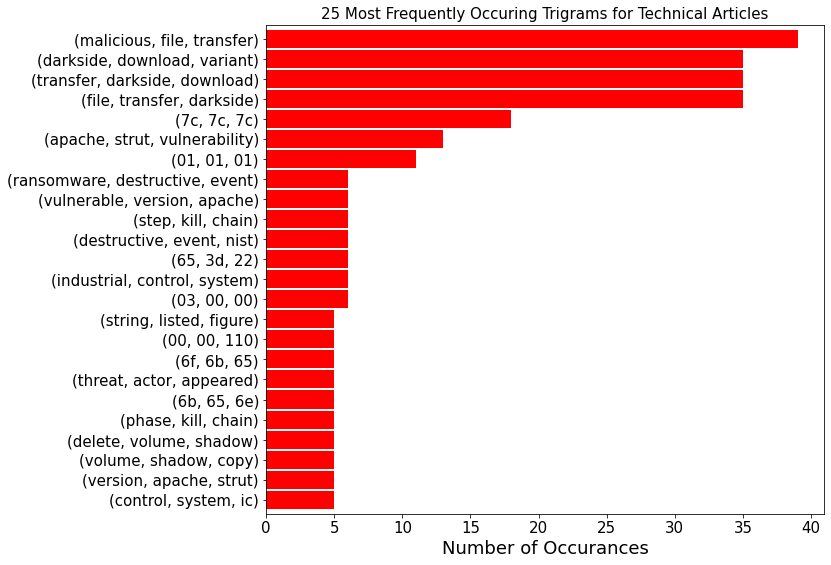

In [90]:
trigrams_series_tech.sort_values().plot.barh(color='red', width=.9, figsize=(10, 9))
plt.title('25 Most Frequently Occuring Trigrams for Technical Articles', fontsize=(15))
plt.xlabel('Number of Occurances', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

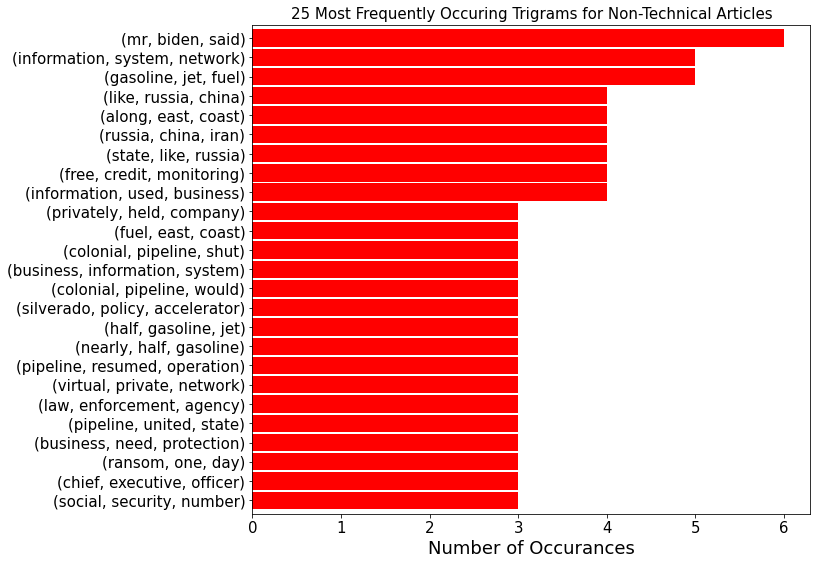

In [93]:
trigrams_series_nontech.sort_values().plot.barh(color='red', width=.9, figsize=(10, 9))
plt.title('25 Most Frequently Occuring Trigrams for Non-Technical Articles', fontsize=15)
plt.xlabel('Number of Occurances', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
